In [190]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

required function's

In [191]:
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq
def read_voice(path):
    rate , data = wavfile.read(path)
    Amplitude = rfft(data)
    Frequency = rfftfreq(len(data) , 1 / rate)
    return Amplitude , Frequency

In [192]:
def get_voice(path):
    rate , data = wavfile.read(path)
    return rate , data

In [193]:
def change_voice_speed(speed_factor , path):
    rate , data = wavfile.read(path)
    new_rate = int(rate * speed_factor)
    return new_rate , data

In [194]:
def low_pass_filter(Frequency, Amplitude, F , t):
    # F is the middle  of the signal
    # t is the cut off's range
    over_head_cutoff_index = np.where(Frequency > F + t)
    before_tail_cutoff_index = np.where(Frequency < F - t)
    high_value_indices = np.where(Amplitude > 1e8)
    filtered_amplitude = np.copy(Amplitude)
    filtered_amplitude[over_head_cutoff_index] = 0
    filtered_amplitude[before_tail_cutoff_index] = 0
    filtered_amplitude[high_value_indices] = 0
    return filtered_amplitude

In [195]:
def reverse_voice(data):
    # flipping the data's can harm a 2'd array be carefull
    return np.flip(data)

In [196]:
import numpy as np
from scipy.signal import resample

def mix_voices(Datas: list, Rates: list):
    rates = np.array(Rates)
    max_rate = np.max(rates)

    # Resample all the data
    resampled_Datas = []
    for i in range(len(Datas)):
        samples_number = round(len(Datas[i]) / Rates[i] * max_rate)
        resampled_data = resample(Datas[i], samples_number)
        resampled_Datas.append(resampled_data)

    # Ensure all resampled data arrays are the same length
    max_len = np.max([len(x) for x in resampled_Datas])
    for i in range(len(resampled_Datas)):
        resampled_Datas[i] = np.pad(resampled_Datas[i], (0, max_len - len(resampled_Datas[i])), "constant")

    # Sum the resampled data
    mixed_data = np.sum(resampled_Datas, axis=0)

    # Normalize the mixed data
    # scaled_mixed_data = mixed_data / np.max(np.abs(mixed_data))
    scaled_mixed_data = mixed_data

    return scaled_mixed_data, max_rate



In [197]:
def write_voice(data , rate , path):
    wavfile.write(path , rate , data)

part 1:

a

In [198]:
amplitudes , frequencies = read_voice("potc.wav")

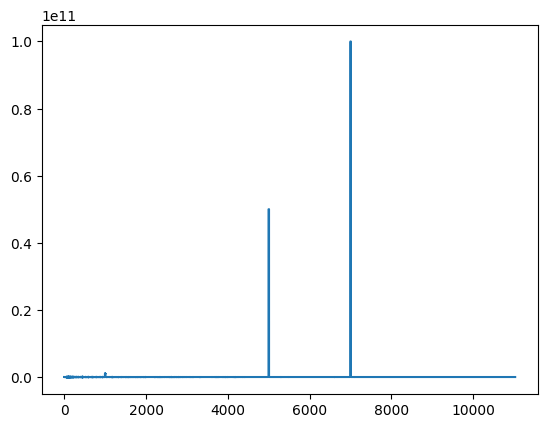

In [199]:
plt.plot(frequencies , amplitudes)
plt.show()

In [200]:
sampling_rate , signal = get_voice("potc.wav")

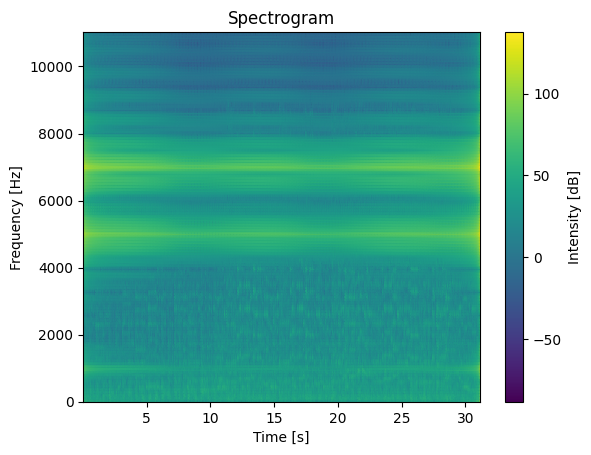

In [201]:
from scipy.signal import spectrogram

freqs , times ,spec = spectrogram(signal , sampling_rate)
plt.pcolormesh(times, freqs, 10 * np.log10(spec), shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()

so with the help of sprctogram and the requency and amplitude plot we can see that if we use a low pass filter 
with the mean on 6000fz and the cutoff 2000fz we can clean this voice easily

In [202]:
filtered_amplitudes = low_pass_filter(frequencies , amplitudes , 10000 , 10000)

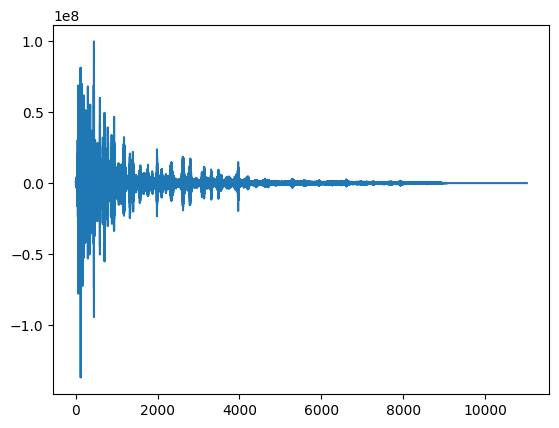

In [203]:
plt.plot(frequencies , filtered_amplitudes)
plt.show()

In [204]:
from scipy.fft import irfft
reconstructed_signal = irfft(filtered_amplitudes*10000).astype(np.int32) #chon mizan X(W) ha kame bayad ziad konim ta seda ham bishtar beshe

write_voice(reconstructed_signal , sampling_rate , "cleanpotc.wav")  

b

In [205]:
x2_sample_rate , x2_signal = change_voice_speed(2 , "cleanpotc.wav")
write_voice(x2_signal , x2_sample_rate , "fastpotc.wav")

c

In [206]:
half_sample_rate , half_signal = change_voice_speed(0.5 , "cleanpotc.wav")
write_voice(half_signal , half_sample_rate, "slowpotc.wav")

d

In [207]:
reverse_signal = reverse_voice(reconstructed_signal)
write_voice(reverse_signal , sampling_rate, "revpotc.wav")

part2:

In [208]:
mixed_voice , mix_rate=mix_voices([reconstructed_signal,x2_signal,half_signal,reverse_signal],[sampling_rate , x2_sample_rate , half_sample_rate , sampling_rate])
write_voice(mixed_voice.astype(np.int32) , mix_rate , "mixpotc.wav")

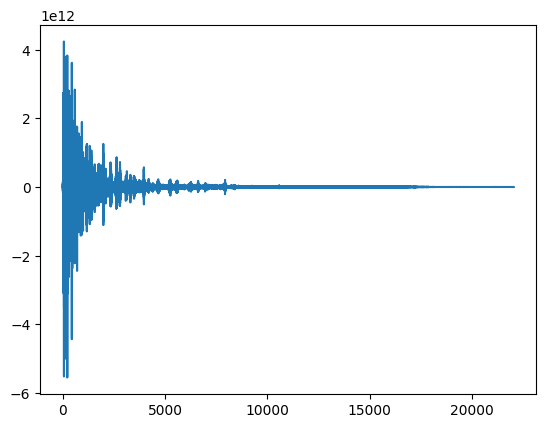

In [209]:
mix_amplitudes , mix_frequencies = read_voice("mixpotc.wav")
plt.plot(mix_frequencies , mix_amplitudes)
plt.show()

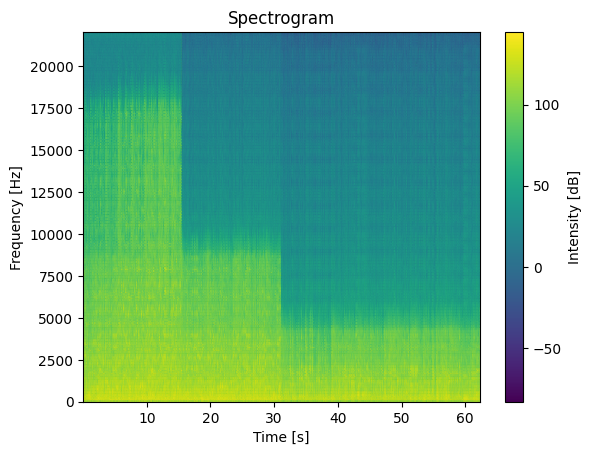

In [210]:
from scipy.signal import spectrogram

freqs , times ,spec = spectrogram(mixed_voice , mix_rate)
plt.pcolormesh(times, freqs, 10 * np.log10(spec), shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()